In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.shape

(730, 16)

In [9]:
#dropping unwanted columns

df.drop('dteday', axis = 1, inplace = True) # dteday is being dropped since we have other columns such as yr,mnth, weekday columns


In [10]:
df.shape

(730, 15)

In [11]:
df.drop(['casual','registered'], axis = 1, inplace = True) #dropping casual and registered since we are interested in cnt which is the target variable

In [12]:
df.shape

(730, 13)

In [13]:
df.drop('instant', axis = 1, inplace = True) # dropping instant since it is not a column which is impacting the target variable cnt

In [14]:
df.shape

(730, 12)

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Conversion to Categorical values for certain columns
1. in case of the column weekday, changing values from 0-6 as Sunday - Saturday Respectively
2. mapping season column as (1:Spring, 2:Summer, 3:Fall, 4:Winter)
3. mapping weathersit column as 
                                 - 1: Good
                                 - 2: Moderate
                                 - 3: Bad
                                 - 4: Worst
4. mapping mnth from 0-12 to January-December

In [16]:
df.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
df.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
df.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Worst'},inplace=True)

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
df.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Looking for outliers using boxplot for the float64 variables
 - temp, atemp, hum and windspeed

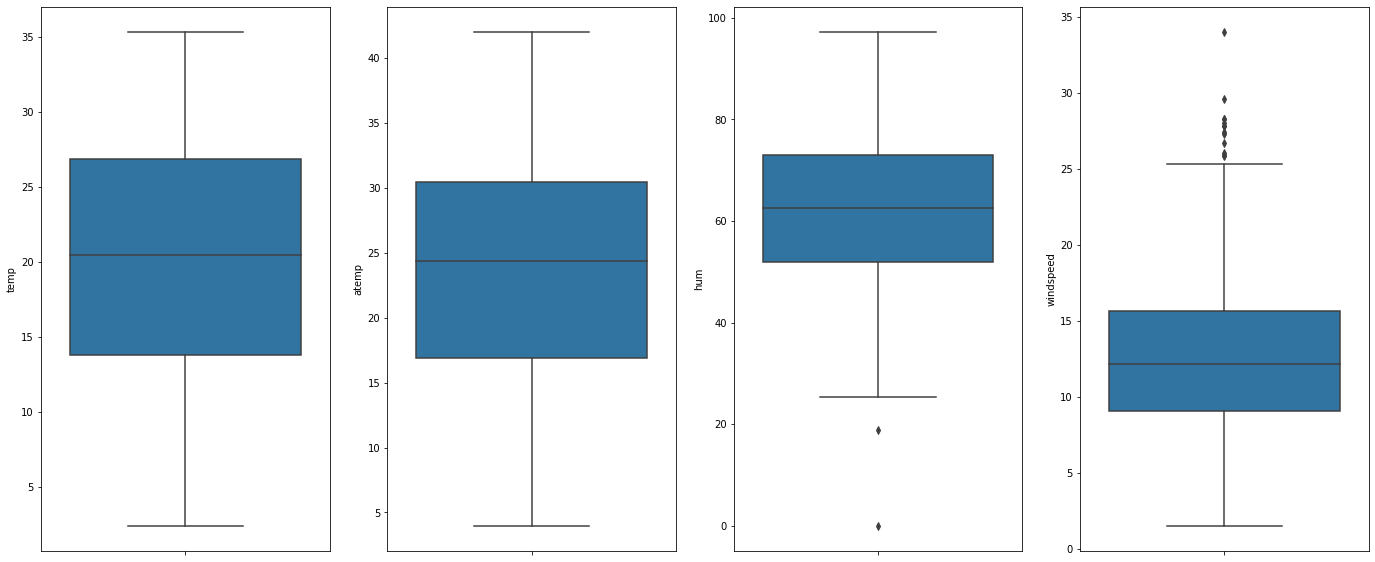

In [25]:
plt.figure(figsize = (30,10))
plt.subplot(1,5,1)
sns.boxplot(y = 'temp', data = df)
plt.subplot(1,5,2)
sns.boxplot(y = 'atemp', data = df)
plt.subplot(1,5,3)
sns.boxplot(y = 'hum', data = df)
plt.subplot(1,5,4)
sns.boxplot(y = 'windspeed', data = df)
plt.show()

The outliers in this data set are negligible hence not deleting the columns with outliers

# Step 2: performing EDA

#### perfoming correlation analysis using pairplot and heatmap
- choosing only the numerical attributes since they were the only values that were likely to have correlation

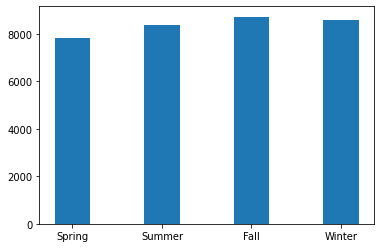

In [26]:
plt.bar(df.season, df.cnt, width = 0.4)
plt.show()

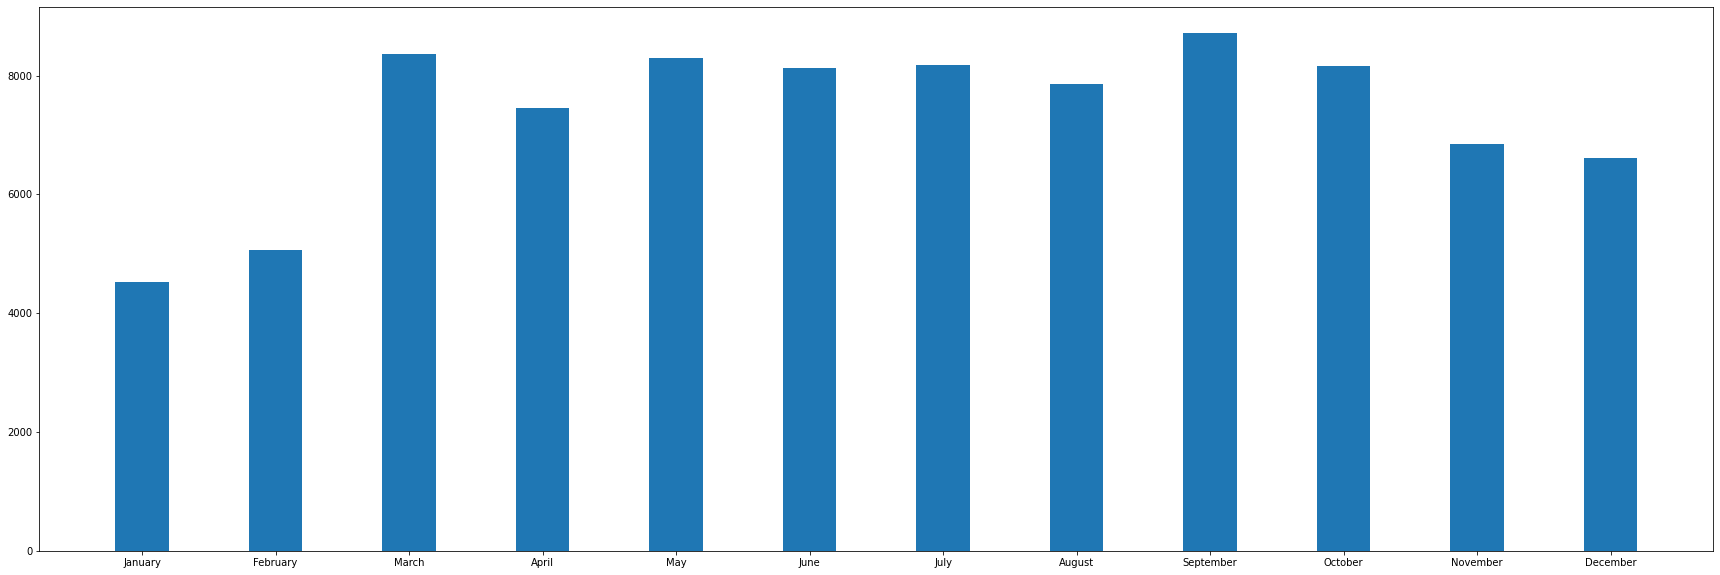

In [27]:
plt.figure(figsize = (30,10))
plt.bar(df.mnth, df.cnt, width = 0.4)
plt.show()

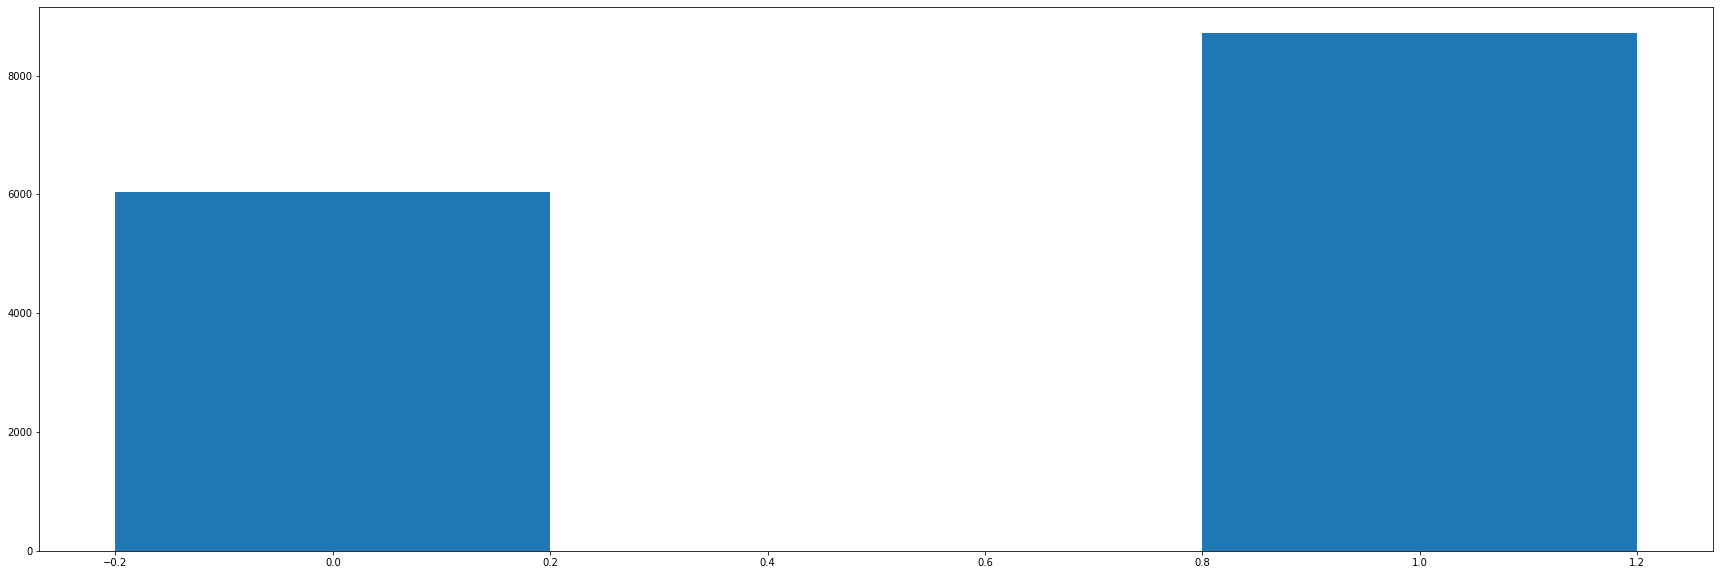

In [28]:
plt.figure(figsize = (30,10))
plt.bar(df.yr, df.cnt, width = 0.4)
plt.show()

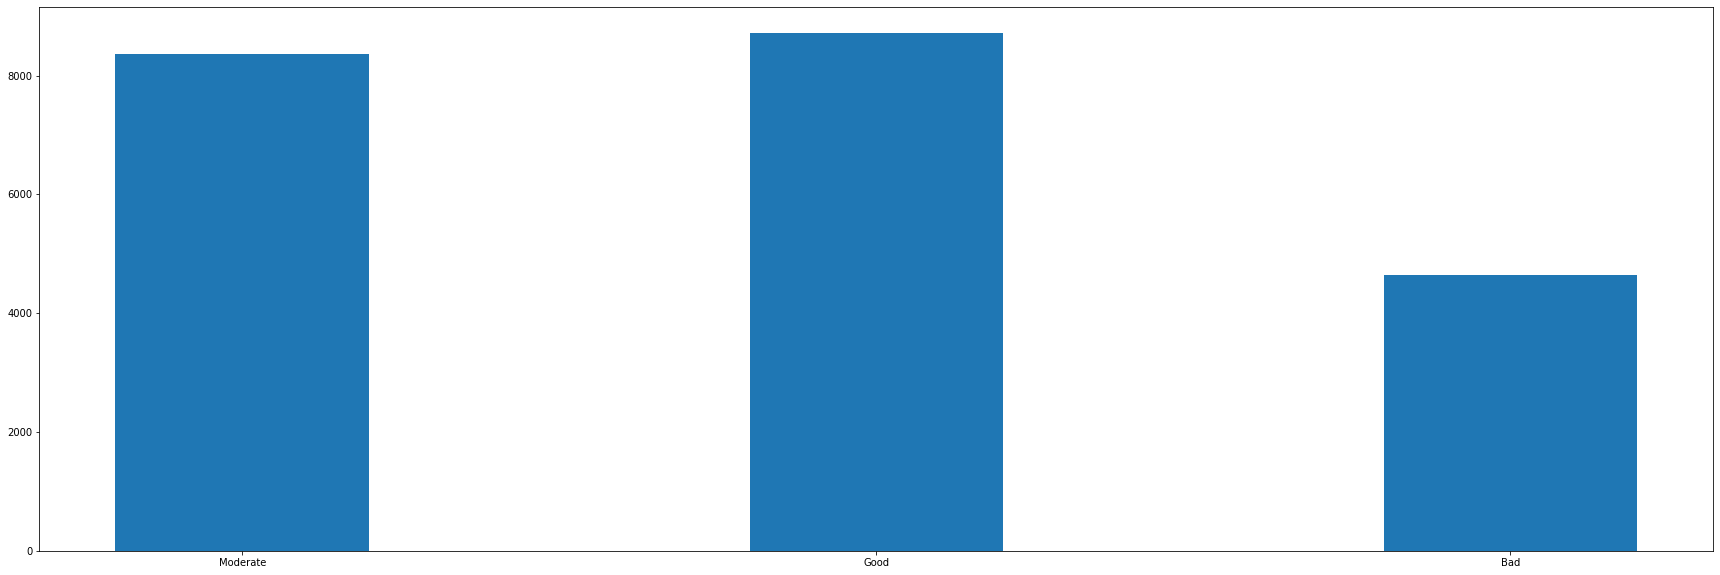

In [29]:
plt.figure(figsize = (30,10))
plt.bar(df.weathersit, df.cnt, width = 0.4)
plt.show()

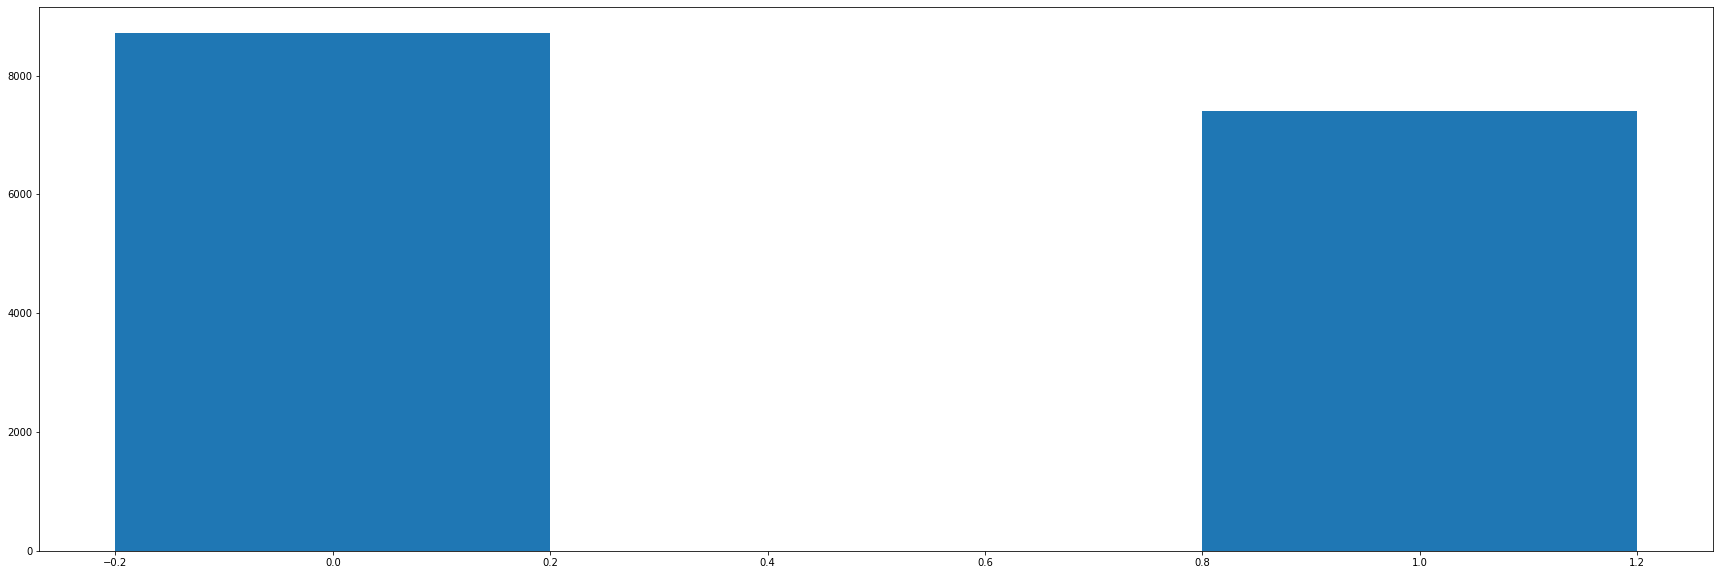

In [30]:
plt.figure(figsize = (30,10))
plt.bar(df.holiday, df.cnt, width = 0.4)
plt.show()

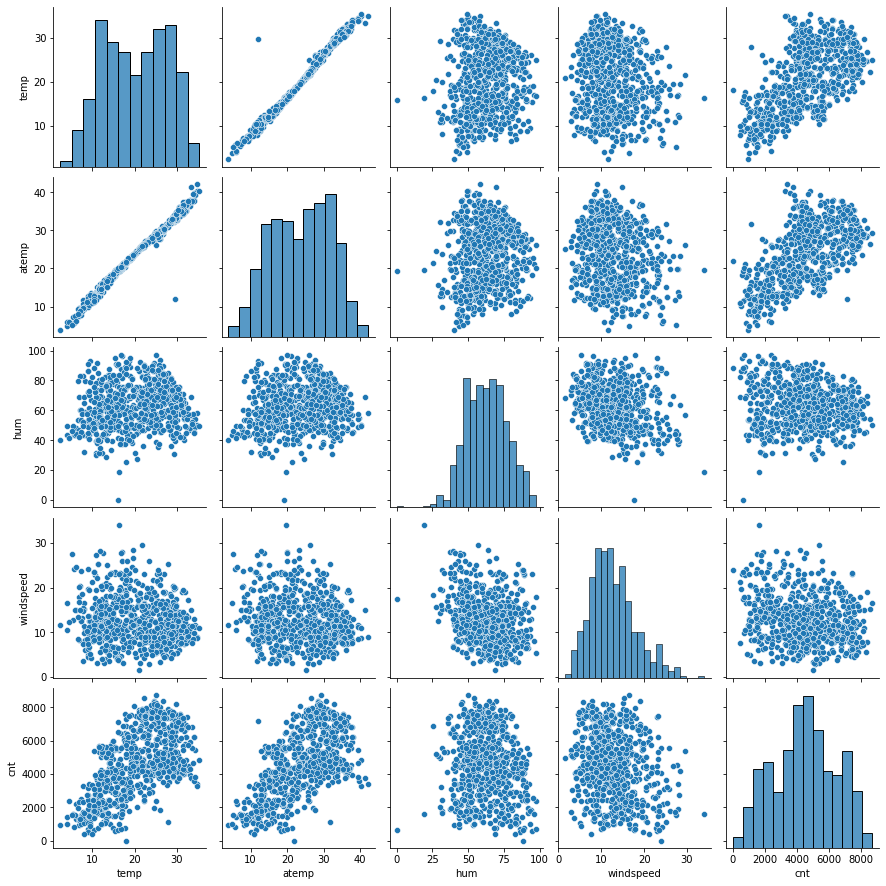

In [31]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

From the plot above, the columns temp and atemp seem to have a very strong positive correlation

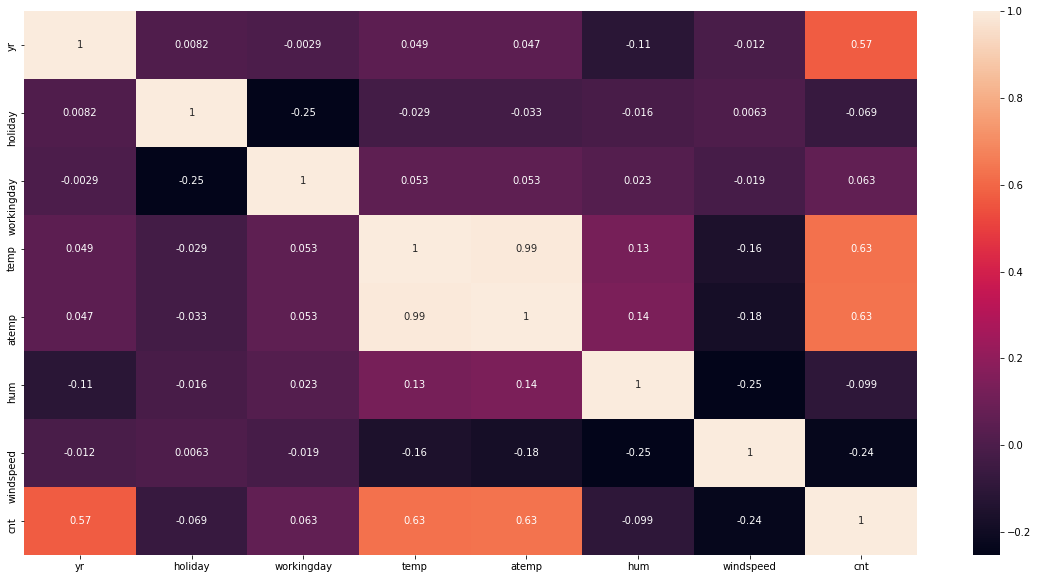

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Dropping the atemp since the correlation is very strong

In [33]:
df.drop('atemp', axis = 1, inplace  = True)

In [34]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,43.6957,12.522300,1600


In [35]:
#Creating dummy sariables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"]) # this column is not dropped since we would need the information on the severity of the weather

In [36]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


# Splitting into test and Training Data

In [37]:
#Test train data split ratio is 80:20
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [38]:
df_train.shape

(584, 30)

In [39]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
367,1,0,1,6.150000,44.1250,24.499957,2236,1,0,0,...,0,0,0,0,0,1,0,0,1,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,1,...,0,0,0,0,1,0,0,0,1,0
44,0,0,1,17.015000,37.5833,27.999836,1913,1,0,0,...,0,1,0,0,0,0,0,0,1,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,41.9167,16.834286,2311,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
df_test.shape

(146, 30)

In [41]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
scaler = MinMaxScaler()
numAtt = ['temp','hum','windspeed']
df_train[numAtt] = scaler.fit_transform(df_train[numAtt])

In [43]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
367,1,0,1,0.113228,0.454701,0.695175,2236,1,0,0,...,0,0,0,0,0,1,0,0,1,0
648,1,0,1,0.468352,0.477458,0.299450,7570,0,0,1,...,0,0,0,0,1,0,0,0,1,0
44,0,0,1,0.443431,0.387290,0.807474,1913,1,0,0,...,0,1,0,0,0,0,0,0,1,0
705,1,0,1,0.326094,0.787463,0.189819,5008,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,2311,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,...,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.630137,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,...,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Creating the X and y sets

In [45]:
X_train = df_train
y_train = df_train.pop('cnt')

In [46]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
705,1,0,1,0.326094,0.787463,0.189819,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
df_train.corr()


,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
yr,1.000000e+00,0.016387,0.033878,0.074245,-0.092385,-0.002452,-0.027737,0.016115,-1.921489e-17,0.021157,...,-0.001811,0.031831,-4.027415e-02,-0.011698,0.034236,-0.000690,0.007279,-0.046575,0.013901,0.001879
holiday,1.638743e-02,1.000000,-0.237967,-0.062935,-0.041692,0.024159,0.071848,-0.071678,2.422508e-02,-0.053024,...,0.027468,0.253845,-7.069461e-02,-0.071638,-0.005042,-0.035060,-0.042585,-0.028169,0.041671,-0.032704
workingday,3.387786e-02,-0.237967,1.000000,0.052794,0.043645,-0.028885,-0.043290,0.040787,-1.259382e-02,0.032983,...,-0.005172,0.182773,-5.972167e-01,-0.605186,0.257697,0.266224,0.290972,0.029288,-0.058388,0.049326
temp,7.424474e-02,-0.062935,0.052794,1.000000,0.154664,-0.180475,-0.625219,0.154182,-2.089073e-01,0.374264,...,0.208143,-0.050649,-1.810454e-02,-0.022478,0.028930,0.020117,0.027424,-0.047145,0.093782,-0.079191
hum,-9.238508e-02,-0.041692,0.043645,0.154664,1.000000,-0.269333,-0.202186,-0.004119,1.664603e-01,0.053962,...,0.154605,0.012976,-3.377276e-02,-0.004623,-0.037830,0.034937,0.044034,0.239446,-0.569803,0.497320
windspeed,-2.452003e-03,0.024159,-0.028885,-0.180475,-0.269333,1.000000,0.189618,0.090455,-1.128375e-01,-0.083008,...,-0.114959,0.031197,5.074203e-02,-0.023518,-0.016299,-0.008487,-0.017121,0.097415,0.007602,-0.041244
season_Spring,-2.773692e-02,0.071848,-0.043290,-0.625219,-0.202186,0.189618,1.000000,-0.331797,-3.348554e-01,-0.183235,...,-0.171585,0.023281,9.366991e-03,0.014707,-0.021748,-0.018946,-0.007148,-0.024832,0.003023,0.005467
season_Summer,1.611478e-02,-0.071678,0.040787,0.154182,-0.004119,0.090455,-0.331797,1.000000,-3.302891e-01,-0.180736,...,-0.169245,0.006114,-1.886348e-02,-0.002110,0.017662,0.008959,0.008893,-0.047341,-0.039004,0.055966
season_Winter,-1.921489e-17,0.024225,-0.012594,-0.208907,0.166460,-0.112838,-0.334855,-0.330289,1.000000e+00,-0.182402,...,0.003634,0.013883,3.075756e-17,0.005476,-0.008672,0.017437,-0.005476,0.096900,-0.057339,0.025000
mnth_August,2.115703e-02,-0.053024,0.032983,0.374264,0.053962,-0.083008,-0.183235,-0.180736,-1.824022e-01,1.000000,...,-0.093466,-0.031734,2.282562e-04,-0.019280,-0.002955,-0.001380,0.013739,-0.053024,0.007442,0.010669


#### Some attributes show good correlation, hence this dataset is good for regression modelling

# Step 3 Training the model

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
rfe = RFE(lm,n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 5),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 10),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          6.51e-225
Time:                        07:17:07   Log-Likelihood:                -4686.7
No. Observations:                 584   AIC:                             9411.
Df Residuals:                     565   BIC:                             9495.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1064.4979    

### Identifying VIF

In [57]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_Moderate,inf
16,weekday_Saturday,inf
2,holiday,inf
3,workingday,inf
19,weathersit_Good,inf
18,weathersit_Bad,inf
17,weekday_Sunday,inf
7,season_Spring,5.89
4,temp,4.73
9,season_Winter,3.64


#### weathersit_Moderate has multicollinearity since VIF is infinite, hence dropping it

In [58]:
X_train_rfe1 = X_train_rfe.drop(["weathersit_Moderate"], axis = 1)

In [59]:
X_train_lm = sm.add_constant(X_train_rfe1)
X_train_new = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train,X_train_new).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          6.51e-225
Time:                        07:17:08   Log-Likelihood:                -4686.7
No. Observations:                 584   AIC:                             9411.
Df Residuals:                     565   BIC:                             9495.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1684.0396    260.252  

In [60]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
17,weekday_Sunday,inf
16,weekday_Saturday,inf
7,season_Spring,5.89
4,temp,4.73
9,season_Winter,3.64
8,season_Summer,2.79
12,mnth_January,2.35
5,hum,1.97


In [61]:
# dropping holiday since VIF is inf and P value is huge
X_train_rfe2 = X_train_rfe1.drop(["holiday"], axis = 1)

In [62]:
X_train_lm = sm.add_constant(X_train_rfe2)
X_train_new = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train,X_train_new).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          6.51e-225
Time:                        07:17:08   Log-Likelihood:                -4686.7
No. Observations:                 584   AIC:                             9411.
Df Residuals:                     565   BIC:                             9495.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1548.8872    378.627  

In [63]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,148.02
2,workingday,8.70
6,season_Spring,5.89
16,weekday_Sunday,5.75
15,weekday_Saturday,5.67
3,temp,4.73
8,season_Winter,3.64
7,season_Summer,2.79
11,mnth_January,2.35
4,hum,1.97


In [64]:
X_train_rfe3 = X_train_rfe2.drop(['weekday_Sunday'],axis = 1)

In [65]:
X_train_lm = sm.add_constant(X_train_rfe3)
X_train_new = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_new).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          6.51e-225
Time:                        07:17:08   Log-Likelihood:                -4686.7
No. Observations:                 584   AIC:                             9411.
Df Residuals:                     565   BIC:                             9495.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1548.8872    378.627  

In [66]:
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,111.92
6,season_Spring,5.88
3,temp,4.71
8,season_Winter,3.64
7,season_Summer,2.78
11,mnth_January,2.35
4,hum,1.97
10,mnth_February,1.93
13,mnth_November,1.70
17,weathersit_Good,1.66


In [67]:
# dropping mnth_February column
X_train_rfe4 = X_train_rfe3.drop(['mnth_February'],axis = 1)

In [68]:
X_train_lm = sm.add_constant(X_train_rfe4)
X_train_new = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train,X_train_new).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.14e-225
Time:                        07:17:09   Log-Likelihood:                -4690.5
No. Observations:                 584   AIC:                             9415.
Df Residuals:                     567   BIC:                             9489.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1838.8225    326.850  

In [69]:
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,109.28
6,season_Spring,5.38
3,temp,4.44
8,season_Winter,3.63
7,season_Summer,2.74
4,hum,1.97
12,mnth_November,1.66
16,weathersit_Good,1.66
10,mnth_January,1.63
2,workingday,1.58


In [70]:
# dropping mnth_February column
X_train_rfe5 = X_train_rfe4.drop(['mnth_January'],axis = 1)

In [71]:
X_train_lm = sm.add_constant(X_train_rfe5)
X_train_new = sm.add_constant(X_train_rfe5)
lm5 = sm.OLS(y_train,X_train_new).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     220.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          3.26e-225
Time:                        07:17:09   Log-Likelihood:                -4694.4
No. Observations:                 584   AIC:                             9421.
Df Residuals:                     568   BIC:                             9491.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1673.3331    323.169  

In [72]:
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.61
6,season_Spring,5.36
3,temp,3.96
8,season_Winter,3.58
7,season_Summer,2.69
4,hum,1.95
15,weathersit_Good,1.66
11,mnth_November,1.63
2,workingday,1.58
13,weekday_Saturday,1.58


In [73]:
# dropping mnth_February column
X_train_rfe6 = X_train_rfe5.drop(['mnth_December'],axis = 1)

In [74]:
X_train_lm = sm.add_constant(X_train_rfe6)
X_train_new = sm.add_constant(X_train_rfe6)
lm6 = sm.OLS(y_train,X_train_new).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          5.74e-225
Time:                        07:17:09   Log-Likelihood:                -4697.8
No. Observations:                 584   AIC:                             9426.
Df Residuals:                     569   BIC:                             9491.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1567.9094    322.187  

In [75]:
vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,103.93
6,season_Spring,5.26
3,temp,3.66
8,season_Winter,3.52
7,season_Summer,2.63
4,hum,1.94
14,weathersit_Good,1.65
2,workingday,1.58
12,weekday_Saturday,1.57
9,mnth_July,1.51


In [76]:
# dropping mnth_February column
X_train_rfe7 = X_train_rfe6.drop(['mnth_November'],axis = 1)

In [77]:
X_train_lm = sm.add_constant(X_train_rfe7)
X_train_new = sm.add_constant(X_train_rfe7)
lm7 = sm.OLS(y_train,X_train_new).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     248.9
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          4.82e-225
Time:                        07:17:10   Log-Likelihood:                -4700.5
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     570   BIC:                             9490.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1463.6180    320.141  

In [78]:
vif = pd.DataFrame()
X = X_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,101.85
6,season_Spring,5.10
3,temp,3.56
8,season_Winter,3.39
7,season_Summer,2.59
4,hum,1.93
13,weathersit_Good,1.65
2,workingday,1.58
11,weekday_Saturday,1.57
9,mnth_July,1.51


In [79]:
X_train_rfe8 = X_train_rfe7.drop(['const'],axis = 1)

In [80]:
X_train_lm = sm.add_constant(X_train_rfe8)
X_train_new = sm.add_constant(X_train_rfe8)
lm8 = sm.OLS(y_train,X_train_new).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     248.9
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          4.82e-225
Time:                        07:17:10   Log-Likelihood:                -4700.5
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     570   BIC:                             9490.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1463.6180    320.141  

In [81]:
vif = pd.DataFrame()
X = X_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.21
2,temp,19.11
5,season_Spring,4.84
4,windspeed,4.70
1,workingday,4.49
7,season_Winter,3.64
12,weathersit_Good,3.42
6,season_Summer,2.93
0,yr,2.09
10,weekday_Saturday,1.78


In [82]:
X_train_rfe9 = X_train_rfe8.drop(['hum'],axis = 1)

In [83]:
X_train_lm = sm.add_constant(X_train_rfe9)
X_train_new = sm.add_constant(X_train_rfe9)
lm9 = sm.OLS(y_train,X_train_new).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          6.57e-222
Time:                        07:17:11   Log-Likelihood:                -4710.8
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     571   BIC:                             9504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              506.3258    244.288  

In [84]:
vif = pd.DataFrame()
X = X_train_rfe9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.51
3,windspeed,4.69
1,workingday,4.38
11,weathersit_Good,2.86
4,season_Spring,2.49
5,season_Summer,2.31
0,yr,2.08
6,season_Winter,1.95
9,weekday_Saturday,1.76
7,mnth_July,1.61


### All the VIF are acceptable and p-value for all attributes are almost 0, R2 is 0.855. R2 - adjusted R2 = 0.004 hence no further removal of variables will be required

# Step 4: Residual Analysis

In [85]:
y_train_cnt = lm9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

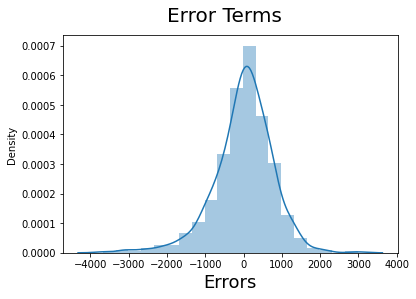

In [86]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

 From the residual distribution graph, we can see that it follows normal distribution with mean around 0.

In [87]:
NumVar=['temp','hum','windspeed']
df_test[NumVar] = scaler.fit_transform(df_test[NumVar])

In [88]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.557681,0.505272,0.424295,4518.965753,0.226027,0.273973,0.219178,...,0.089041,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.650685,0.315068
std,0.498699,0.182488,0.436469,0.253870,0.211227,0.191469,1849.283281,0.419697,0.447530,0.415114,...,0.285783,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.478395,0.466142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,506.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.333197,0.368184,0.283271,3422.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547706,0.476798,0.413929,4445.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.805408,0.633120,0.539098,5671.750000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Making Predictions

In [89]:
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [91]:
y_pred = lm9.predict(X_test_new)

Text(0, 0.5, 'y_pred')

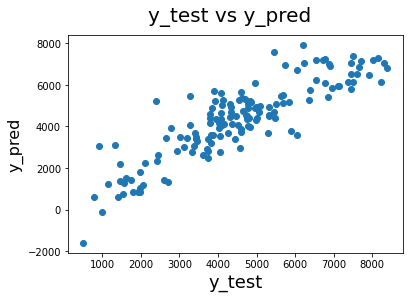

In [92]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)   
plt.ylabel('y_pred', fontsize=16)  

In [93]:
r2_score(y_test, y_pred)

0.7387511021511536